In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Load data

#cs_file = '../data/SMB_input_four_ERA5_all.csv'
#cs_file = '../data/SMB_input_four_ERA5_200.csv' 
#cs_file = '../data/SMB_input_belli_sea_ERA5.csv'
cs_file = '../data/SMB_input_four_sea_ERA5.csv'

dfmb = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date'],
    parse_dates=['Date'], na_values='NAN')
labels = dfmb.drop_duplicates(subset=['Stake'])

<AxesSubplot:xlabel='PDD', ylabel='SMB'>

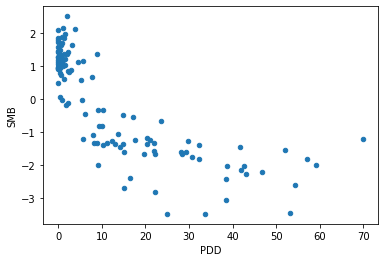

In [43]:
dfmb[['PDD', 'SMB']].plot.scatter(x='PDD', y='SMB')

In [44]:
(dfmb[['PDD', 'SMB']].corr())**2

,PDD,SMB
PDD,1.00000,0.61939
SMB,0.61939,1.00000


In [45]:
dfmb1 = dfmb.copy()
# reset SMB, tp, snowfall and PDD to 0 on 0 days observation
dfmb1[['SMB', 'PDD' ]] = dfmb1[['SMB','PDD']].where(dfmb1['SMB'] < 0, np.nan)

In [46]:
(dfmb1[['PDD', 'SMB']].corr())**2

,PDD,SMB
PDD,1.000000,0.316837
SMB,0.316837,1.000000


<AxesSubplot:xlabel='PDD', ylabel='SMB'>

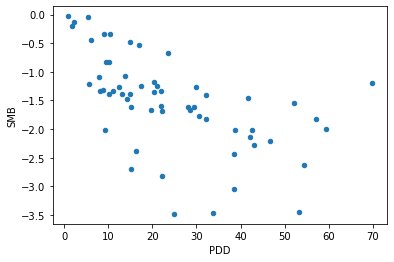

In [47]:
dfmb1[['PDD', 'SMB']].plot.scatter(x='PDD', y='SMB')

<AxesSubplot:>

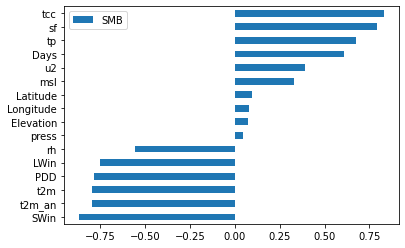

In [48]:
dfmb.corr()['SMB'].sort_values().to_frame().drop('SMB').plot.barh()

/tmp/ipykernel_80649/2961832091.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1,1,figsize=(4.5,3.5))


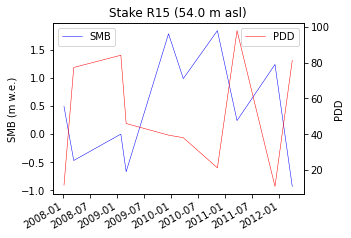

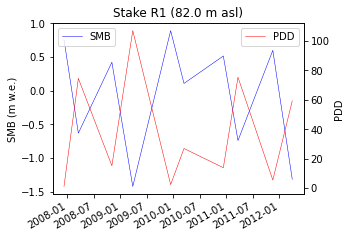

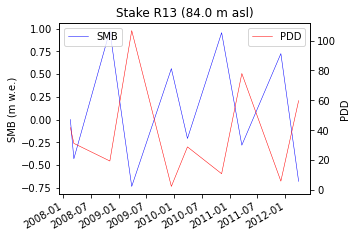

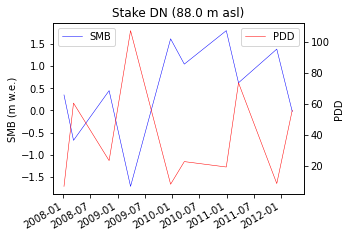

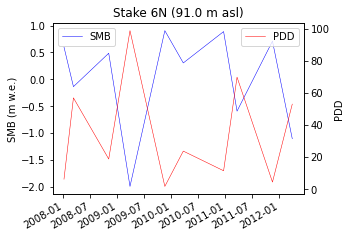

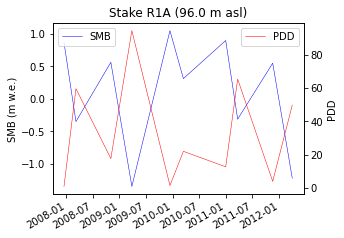

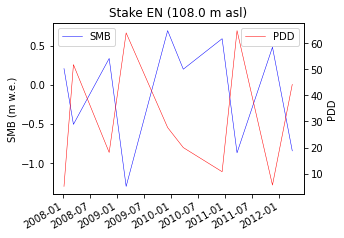

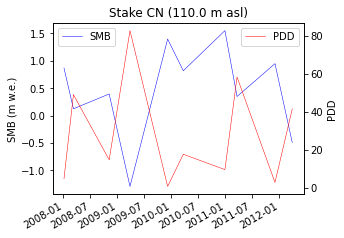

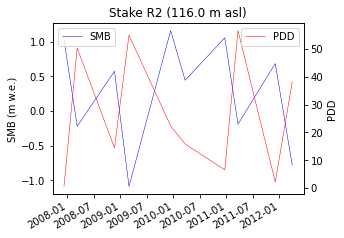

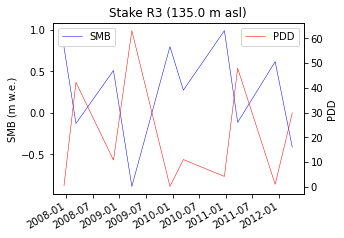

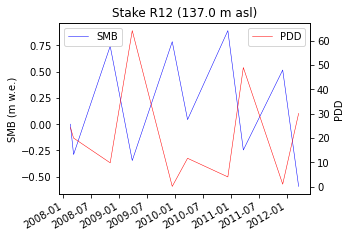

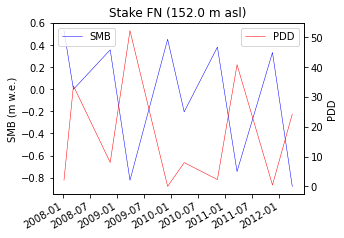

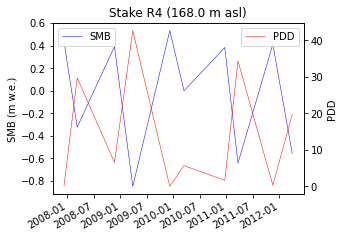

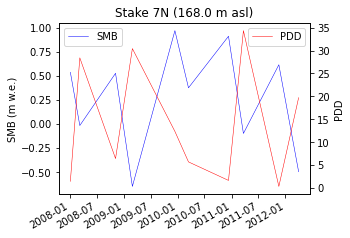

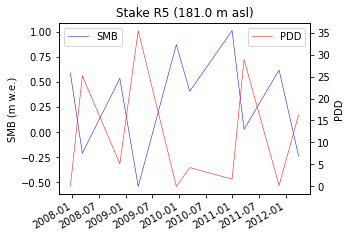

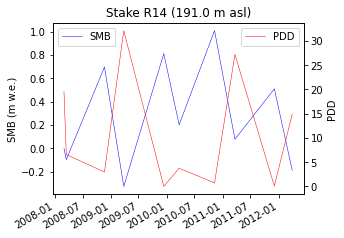

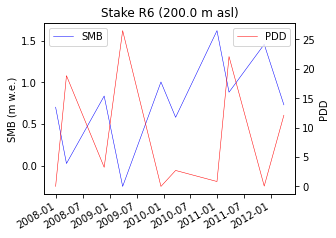

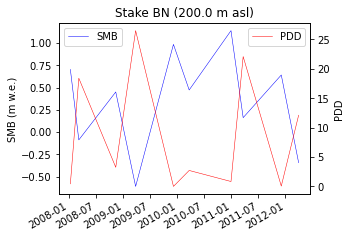

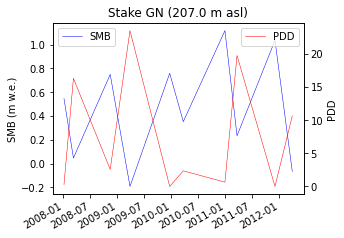

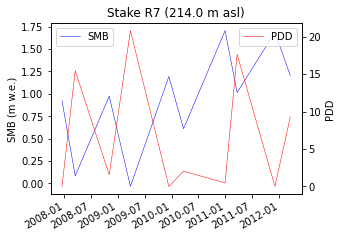

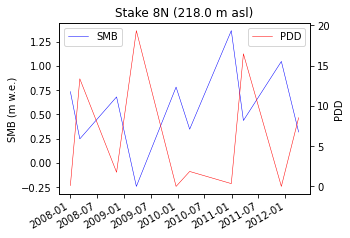

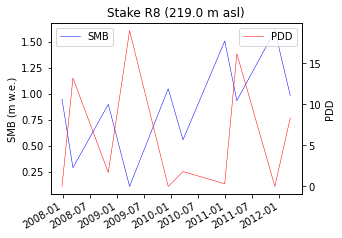

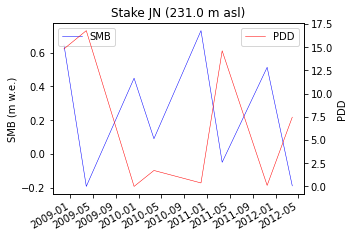

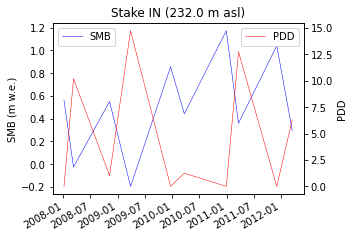

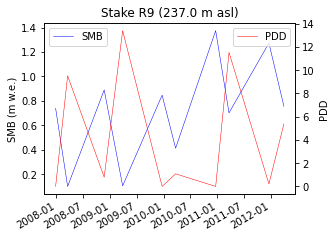

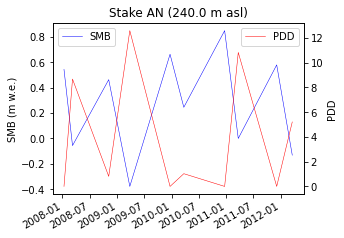

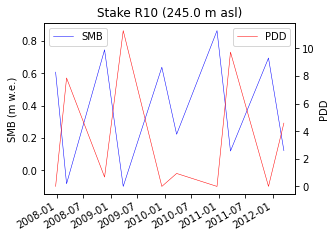

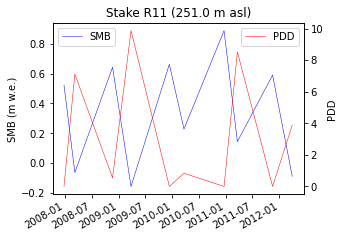

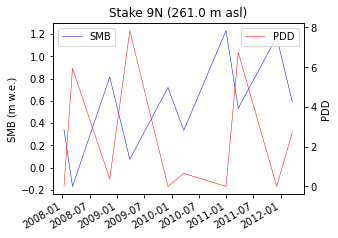

In [13]:
for i in labels['Stake']:
    fig, ax1 = plt.subplots(1,1,figsize=(4.5,3.5))
    ax2 = ax1.twinx()
    stake = dfmb.loc[lambda df: df['Stake'] == i, :]
    ax1.plot(stake['SMB'], 'b-', linewidth=0.5) #['20121101':'20151031']
    ax2.plot(stake['PDD'], 'r-', linewidth=0.5)
    ax1.legend(['SMB'], loc='upper left')
    ax1.set_ylabel(u'SMB (m w.e.)')
    #ax1.set_ylim(0, 30)
    ax1.set_title('Stake'+ ' ' + i +' '+ '('+str(stake['Elevation'].values[0])+' '+'m asl)')
    ax2.legend(['PDD'], loc='upper right')
    ax2.set_ylabel('PDD')
    #ax2.set_ylim(0, 365)
    fig.autofmt_xdate()
    fig.savefig('../fig/bell/stake_'+i+'.png',dpi = 200, bbox_inches = 'tight', 
                 pad_inches = 0.1, facecolor='w')

<AxesSubplot:xlabel='PDD', ylabel='SMB'>

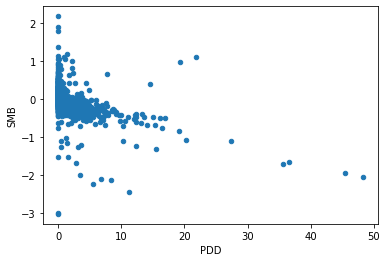

In [34]:
dfmb[['PDD', 'SMB']].plot.scatter(x='PDD', y='SMB')

In [35]:
dfmb[['PDD', 'SMB']].corr()

,PDD,SMB
PDD,1.000000,-0.469785
SMB,-0.469785,1.000000


In [10]:
dfmb1 = dfmb.copy()
dfmb1

,Stake,Latitude,Longitude,Elevation,Days,SMB,t2m,rh,u2,SWin,LWin,tp,sf,msl,press,tcc,t2m_an,PDD
Date,,,,,,,,,,,,,,,,,,
2011-03-02,PG01,-62.201488,-58.583236,435.7,0,3.14,-0.842712,88.928460,14.502913,193.751170,262.32993,0.000240,0.000000,988.82900,938.89734,0.569043,1.283319,0.000000
2011-03-07,PG01,-62.201488,-58.583236,435.7,5,-3.03,-1.547089,91.561660,12.955721,103.991370,288.65213,0.027941,0.004176,984.74524,934.99945,0.884296,1.111962,0.000000
2011-03-09,PG01,-62.201488,-58.583236,435.7,2,0.10,-2.051198,93.916790,10.064571,71.619350,300.07703,0.010606,0.001503,986.69165,936.83850,0.940137,0.989325,0.000000
2013-02-11,PG01,-62.201488,-58.583236,435.7,705,0.05,-6.571172,87.573740,9.982855,101.991410,264.68054,1.763367,1.475362,990.60895,940.44910,0.847065,-0.110270,0.000000
2013-02-19,PG01,-62.201488,-58.583236,435.7,8,-0.08,-2.980143,88.867760,9.313358,137.897220,287.33777,0.024997,0.017200,981.61755,931.99060,0.897450,0.763336,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-17,PG19,-62.237672,-58.633624,96.8,44,-0.43,-0.284498,85.731510,9.542617,207.966920,274.65402,0.085414,0.065327,987.89500,976.44020,0.800041,0.676566,12.224274
2016-02-25,PG19,-62.237672,-58.633624,96.8,8,-0.20,0.197350,89.256035,8.389152,127.560770,287.32523,0.027218,0.014801,978.77210,967.44150,0.913182,0.796762,4.630981
2016-03-10,PG19,-62.237672,-58.633624,96.8,14,-0.45,0.442562,91.217650,9.195325,110.797840,284.02000,0.021845,0.006020,992.81160,981.32086,0.792833,0.857929,7.281006


In [12]:
dfmb1[['PDD' ]] = dfmb1[['PDD']].where(dfmb1['SMB'] < 0, 0)
dfmb1

,Stake,Latitude,Longitude,Elevation,Days,SMB,t2m,rh,u2,SWin,LWin,tp,sf,msl,press,tcc,t2m_an,PDD
Date,,,,,,,,,,,,,,,,,,
2011-03-02,PG01,-62.201488,-58.583236,435.7,0,3.14,-0.842712,88.928460,14.502913,193.751170,262.32993,0.000240,0.000000,988.82900,938.89734,0.569043,1.283319,0.000000
2011-03-07,PG01,-62.201488,-58.583236,435.7,5,-3.03,-1.547089,91.561660,12.955721,103.991370,288.65213,0.027941,0.004176,984.74524,934.99945,0.884296,1.111962,0.000000
2011-03-09,PG01,-62.201488,-58.583236,435.7,2,0.10,-2.051198,93.916790,10.064571,71.619350,300.07703,0.010606,0.001503,986.69165,936.83850,0.940137,0.989325,0.000000
2013-02-11,PG01,-62.201488,-58.583236,435.7,705,0.05,-6.571172,87.573740,9.982855,101.991410,264.68054,1.763367,1.475362,990.60895,940.44910,0.847065,-0.110270,0.000000
2013-02-19,PG01,-62.201488,-58.583236,435.7,8,-0.08,-2.980143,88.867760,9.313358,137.897220,287.33777,0.024997,0.017200,981.61755,931.99060,0.897450,0.763336,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-17,PG19,-62.237672,-58.633624,96.8,44,-0.43,-0.284498,85.731510,9.542617,207.966920,274.65402,0.085414,0.065327,987.89500,976.44020,0.800041,0.676566,12.224274
2016-02-25,PG19,-62.237672,-58.633624,96.8,8,-0.20,0.197350,89.256035,8.389152,127.560770,287.32523,0.027218,0.014801,978.77210,967.44150,0.913182,0.796762,4.630981
2016-03-10,PG19,-62.237672,-58.633624,96.8,14,-0.45,0.442562,91.217650,9.195325,110.797840,284.02000,0.021845,0.006020,992.81160,981.32086,0.792833,0.857929,7.281006


In [51]:
dfmb1 = dfmb.copy()
# reset SMB, tp, snowfall and PDD to 0 on 0 days observation
dfmb1[['SMB', 'PDD' ]] = dfmb1[['SMB','PDD']].where(dfmb1['SMB'] < 0, np.nan)
dfmb1[['SMB', 'PDD' ]] = dfmb1[['SMB','PDD']].where(dfmb1['Elevation'] < 260, np.nan)
#dfmb1[['SMB', 'PDD' ]] = dfmb1[['SMB','PDD']].where(dfmb1['SMB'] > -0.5, np.nan)
dfmb1[['SMB']] = dfmb1[['SMB']]*1000
dfmb1.dropna(inplace=True)

<AxesSubplot:xlabel='PDD', ylabel='SMB'>

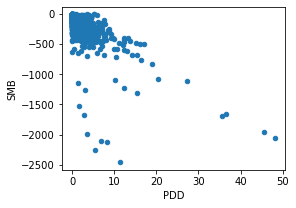

In [52]:
dfmb1[['PDD', 'SMB']].plot.scatter(x='PDD', y='SMB', figsize=(4,3))

In [38]:
(dfmb1[['PDD', 'SMB']].corr())**2

,PDD,SMB
PDD,1.000000,0.432887
SMB,0.432887,1.000000


In [47]:
dfmb1[['Stake','Elevation','Days','SMB','PDD']]

,Stake,Elevation,Days,SMB,PDD
Date,,,,,
2010-12-23,PG07,188.6,12,-150.0,0.000000
2011-01-09,PG07,188.6,17,-430.0,1.081360
2011-04-06,PG07,188.6,35,-2130.0,8.332397
2012-01-24,PG07,188.6,101,-1260.0,3.098206
2012-01-27,PG07,188.6,3,-110.0,0.000000
...,...,...,...,...,...
2016-01-04,PG19,96.8,9,-550.0,3.934112
2016-02-17,PG19,96.8,44,-430.0,12.224274
2016-02-25,PG19,96.8,8,-200.0,4.630981


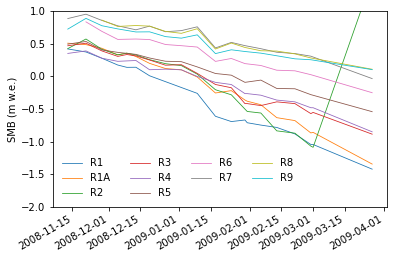

In [56]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))

for i in labels['Stake'][0:10]:
    stake = dfmb.loc[lambda df: df['Stake'] == i, :]
    ax1.plot(stake['SMB']['20081001':'20090530'], linewidth=0.8, label=i)

fig.autofmt_xdate()
ax1.set_ylabel('SMB (m w.e.)')
ax1.set_ylim(-2, 1)
ax1.legend(loc='best',ncol=4, frameon=False)
fig.savefig('../fig/SMB_sel_200811_200904.png',dpi = 200, bbox_inches = 'tight', 
             pad_inches = 0.1, facecolor='w')

In [4]:
#for i in labels['Stake']:#[0:]:
#    print(i)
#    stake = dfmb.loc[lambda df: df['Stake'] == i, :]
#    print(stake['PDD']['2010':'2011'])
#    print(stake['Days']['2010':'2011'])


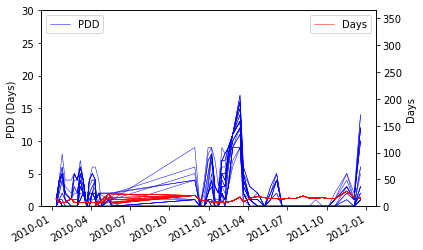

In [5]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))
ax2 = ax1.twinx()

for i in labels['Stake']:#[0:]:
    stake = dfmb.loc[lambda df: df['Stake'] == i, :]
    ax1.plot(stake['PDD']['2010':'2011'], 'b-', linewidth=0.5)
    ax2.plot(stake['Days']['2010':'2011'], 'r-', linewidth=0.5)
ax1.legend(['PDD'], loc='upper left')
ax1.set_ylabel(u'PDD (Days)')
ax1.set_ylim(0, 30)

ax2.legend(['Days'], loc='upper right')
ax2.set_ylabel('Days')
ax2.set_ylim(0, 365)
fig.autofmt_xdate()

<AxesSubplot:>

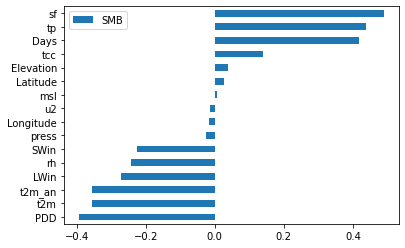

In [57]:
dfmb.corr()['SMB'].sort_values().to_frame().drop('SMB').plot.barh()

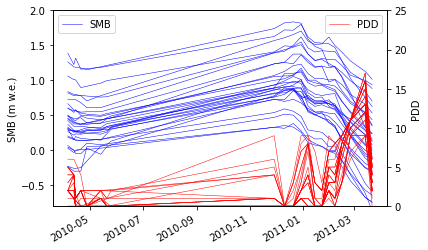

In [11]:
fig, ax1 = plt.subplots(1,1,figsize=(6,4))
ax2 = ax1.twinx()

for i in labels['Stake']:#[0:]:
    stake = dfmb.loc[lambda df: df['Stake'] == i, :]
    ax1.plot(stake['SMB']['20100401':'20110331'], 'b-', linewidth=0.5)
    ax2.plot(stake['PDD']['20100401':'20110331'], 'r-', linewidth=0.5)
ax1.legend(['SMB'], loc='upper left')
ax1.set_ylabel(u'SMB (m w.e.)')
ax1.set_ylim(-0.8, 2.0)

ax2.legend(['PDD'], loc='upper right')
ax2.set_ylabel('PDD')
ax2.set_ylim(0, 25)
fig.autofmt_xdate()